# **Import packages**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Nearest Neighbor Interpolation functions**


In [7]:
def custom_nearest_neighbor(matrix, scale_factor):
    """
    Zooming using Nearest Neighbor Interpolation

    Parameters:
    matrix: Input 2D image
    scale_factor (float): Factor by which to scale the matrix

    Returns:
    numpy.ndarray: Scaled matrix
    """
    # Get original dimensions
    orig_height, orig_width = matrix.shape

    # Calculate new dimensions using round to match scipy
    new_height = int(np.round(orig_height * scale_factor))
    new_width = int(np.round(orig_width * scale_factor))

    # Calculate actual scale factors based on endpoint mapping
    actual_height_scale = (orig_height - 1) / (new_height - 1) if new_height > 1 else 0
    actual_width_scale = (orig_width - 1) / (new_width - 1) if new_width > 1 else 0

    # Create output array
    scaled = np.zeros((new_height, new_width))

    # Iterate through each pixel in the output image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate source coordinates using endpoint-based scaling
            src_i = int(np.clip(np.round(i * actual_height_scale), 0, orig_height - 1))
            src_j = int(np.clip(np.round(j * actual_width_scale), 0, orig_width - 1))
            scaled[i, j] = matrix[src_i, src_j]

    return scaled

In [2]:
def custom_nearest_neighbor_shrink(matrix, scale_factor):
    """
    Shrink an image using a modified nearest neighbor approach with area consideration.

    Parameters:
    matrix: Input 2D image
    scale_factor (float): Factor by which to scale the matrix (should be < 1)

    Returns:
    numpy.ndarray: Shrunk matrix
    """
    if scale_factor >= 1:
        return custom_nearest_neighbor(matrix, scale_factor)

    # Get original dimensions
    orig_height, orig_width = matrix.shape

    # Calculate new dimensions
    new_height = int(np.round(orig_height * scale_factor))
    new_width = int(np.round(orig_width * scale_factor))

    # Create output array
    scaled = np.zeros((new_height, new_width))

    # Calculate the size of source pixels that map to one destination pixel
    pixel_width = orig_width / new_width
    pixel_height = orig_height / new_height

    # Iterate through each pixel in the output image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate center of target pixel in source coordinates
            src_center_i = (i + 0.5) * pixel_height
            src_center_j = (j + 0.5) * pixel_width

            # Find nearest source pixel to center
            src_i = int(np.clip(np.round(src_center_i - 0.5), 0, orig_height - 1))
            src_j = int(np.clip(np.round(src_center_j - 0.5), 0, orig_width - 1))

            scaled[i, j] = matrix[src_i, src_j]

    return scaled

In [15]:
def nearest_neighbor_resize(image, scale_factor):
  """
  Driver function for selecting either zooming in or shrinking

  Parameters:
  matrix: 2D Image
  scale_factor: Factor by which to scale the image

  Returns:
  numpy.ndarray: Scaled image
  """

  if scale_factor >= 1:
    return custom_nearest_neighbor(image, scale_factor)
  else:
    return custom_nearest_neighbor_shrink(image, scale_factor)

# **Main Method**

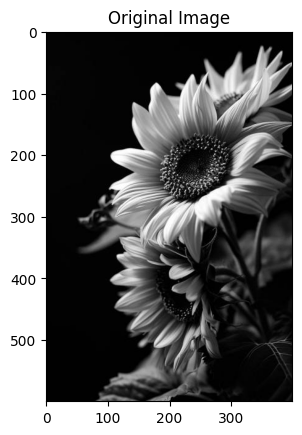

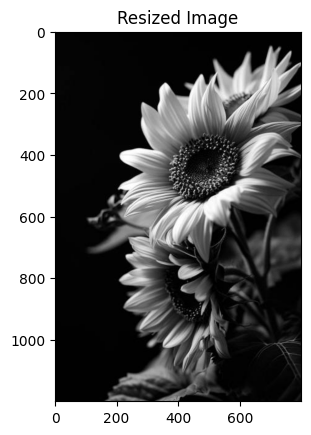

In [14]:
if __name__ == '__main__':
    #Input image path
    image_path = '/content/flower.jpg'
    # Read and display an image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.show()

    # Scale the image
    scale_factor = 2.0

    # Nearest Neighbor Interpolation
    scaled_image = nearest_neighbor_resize(image, scale_factor)

    # Display output image
    output_image_path = image_path[:-4]+'_output_image'+'_'+str(scale_factor)+'.jpg'
    cv2.imwrite(output_image_path, scaled_image)
    plt.imshow(scaled_image, cmap='gray')
    plt.title("Resized Image")
    plt.show()